In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Linear Regression: Linear model

Say i have a data 
$$\mathrm{Data\ (D)}=\{(x_1,y_1),...,(x_n,y_n)\}$$
And i can make an assumption that $x_i \ and \ y_i$ are linearly related, i.e
$$ y = y(x) = a x + b$$

Then we should find such $(a,b)$ coefficients that all
$$y_i = \beta_2 x_i + \beta_1 \ ; i = 1,...,n$$ 
are satisfied as best as possible.

Using given data we can write a set of equations
\begin{cases}
y_1 = \beta_2 x_1 + \beta_1 \\
y_2 = \beta_2 x_2 + \beta_1 \\
\dots \\
y_n = \beta_2 x_n + \beta_1 
\end{cases}

Or given that
$$ y_1 = \beta_2 x_1 + \beta_1 = \mathrm{dot}[(1, x_1), (\beta_1, \beta_2)] = 
\begin{bmatrix}
1 & x_1
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_1
\end{bmatrix}
$$

We represent this problem in matrix format by 'stacking' vectors
$$
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$

Problem takes form of linear matrix equation 
$$X\vec{\beta} = \vec{y}$$
Classical way of thinking is: when data does not exactly fit the line (otherwise it would be enough to take 2 rows of $X$),<br>
we assume that by applying $\vec{\beta}$, we introduce some error $\vec{\epsilon}$ into $\vec{y}$:
$$X\vec{\beta} = \vec{y} + \vec{\epsilon}$$ 
Thus we want to find such $\vec{\beta}$ that minimize $\vec{\epsilon}$:
$$\vec{\epsilon} = X\vec{\beta} - \vec{y}$$

In the best case error is zero, $\vec{\epsilon} = [0\ 0\ 0\ ...]^T \leftrightarrow ||\vec{\epsilon} || = 0$

There are different options on how we define and minimize $||\vec{\epsilon}||$, but classical approach for linear regression is to calculate a L2 norm 
$$||\vec{\epsilon} ||_2 := \sqrt{\epsilon_1^2 + \epsilon_2^2 + \dots + \epsilon_n^2} = \sqrt{\sum_i^n \epsilon_i^2} = \sqrt{\vec{\epsilon} \cdot \vec{\epsilon}}
$$ 

But also different variations are available which affect the result of $\vec{\beta}$ i.e

[Ordinary Least Squares (OLS)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):
$$ f(\vec{\beta}) = ||X\vec{\beta} - \vec{y}||_2$$

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html):
$$ f(\vec{\beta}) = ||X\vec{\beta} - \vec{y}||_2  + ||\vec{\beta} ||_1 $$

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html):
$$ f(\vec{\beta}) = ||X\vec{\beta} - \vec{y}||_2  + ||\vec{\beta} ||_2 $$

<i> Comparison of few algorithms is given in Regression/Brunton_sparse_regression.ipynb </i>

## Example for OLS

* generate data with noise
* construct matrix X py padding offset (intercept has to be disabled)
* fit data

0.9865478509034484


(array([[-0.04038007,  2.99292835]]), 0.0)

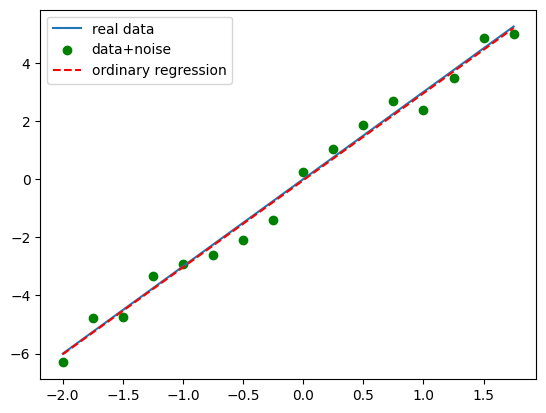

In [25]:
np.random.seed(69)
slope = 3
x = np.arange(-2.0, 2.0, 0.25)                # domain
x = x.reshape(-1,1)                     # form a matrix (N,1)
noise = (np.random.rand(*x.shape)-0.5)*1.5    # generate noise
y = slope*x + noise                     # gen linearly related data

X = np.hstack((np.ones_like(x),x))

reg = LinearRegression(fit_intercept = False).fit(X, y)

plt.plot(x,slope*x, label='real data')
plt.scatter(x,y, c='g',label='data+noise')
plt.plot(x, X @ reg.coef_.T, c='r', linestyle='--', label='ordinary regression')
plt.legend()
print(reg.score(X, y))
reg.coef_, reg.intercept_

Let LinearRegression() find intercept without padding

In [26]:
reg2 = LinearRegression(fit_intercept = True).fit(x, y)
reg2.coef_, reg2.intercept_

(array([[2.99292835]]), array([-0.04038007]))

As a side-note, we can fit nonlinear models using same framework:

$$
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \beta_3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$

<i> which is explored in data_processing/Sparse_Identification_of_Nonlinear_DYnamics_SINDY/SINDy_01_Brunton.ipynb </i>

(16, 1) (1,) (1, 1)


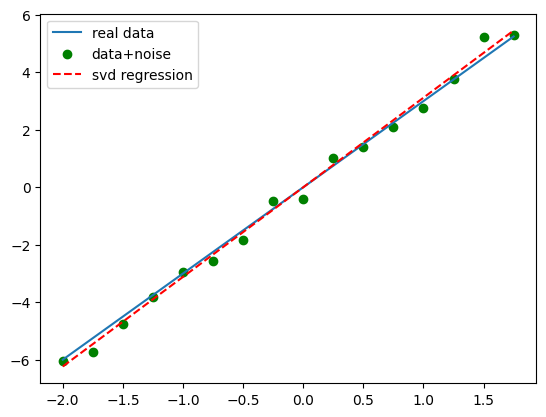

In [27]:
slope = 3
param_a = np.arange(-2.0, 2.0, 0.25)                # domain
param_a = param_a.reshape(-1,1)                     # form a matrix (N,1)
noise = (np.random.rand(*param_a.shape)-0.5)*1.5    # generate noise
param_b = slope*param_a + noise                     # gen linearly related data

U_hat,S_hat,V_hat = np.linalg.svd(param_a,full_matrices=False)
print(U_hat.shape, S_hat.shape, V_hat.shape)
S_hat_inv = (1/np.diag(S_hat))
left_side = V_hat @ S_hat_inv @ U_hat.T
x_prim =  left_side @ param_b

plt.plot(param_a,slope*param_a, label='real data')
plt.scatter(param_a,param_b, c='g',label='data+noise')
plt.plot(param_a,x_prim * param_a, c='r', linestyle='--', label='svd regression')
plt.legend()